## Connect to the Northwind dataset using SQL

In [1]:
import psycopg2 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

constr =  "host='dsi.c20gkj5cvu3l.us-east-1.rds.amazonaws.com' dbname='northwind' user='dsi_student' password = 'gastudents'"


conn = psycopg2.connect(constr)

## Create a pandas df that is the combination of the orders and order_details tables
Each row of your df represents a unique order / product pair.  You could either bring in the tables separately, and join in pandas, or join in SQL, and bring in one table.  Ideally you should try both ways to practice!

In [2]:
df = pd.read_sql('SELECT * FROM orders JOIN order_details ON orders."OrderID" = order_details."OrderID";', conn)

In [3]:
df.head()

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France,10248,11,14.0,12,0.0
1,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France,10248,42,9.8,10,0.0
2,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France,10248,72,34.8,5,0.0
3,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany,10249,14,18.6,9,0.0
4,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany,10249,51,42.4,40,0.0


In [4]:
conn.close()

## Explore the data!  Convert data types as appropriate, calculate new variables, do some exploratory analysis with pivot_tables and plotting
You can treat this as an open-ended assignment, and decide what you want to explore, or you can answer the questions below.

### 1)  Which employee had the highest total revenues?  Plot a bar chart to show this.

In [5]:
df["revs"] = df["Quantity"]*df["UnitPrice"]

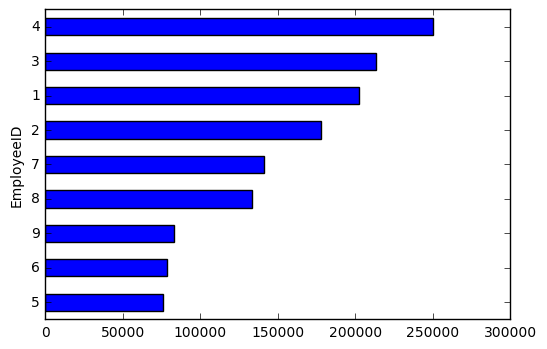

In [6]:
pd.pivot_table(df, index="EmployeeID", values="revs", aggfunc=sum).sort_values().plot(kind="barh")

### Challenge: create a scatter plot of unit price / quantity and colour-code by employee

[1, 2, 3, 4, 5, 6, 7, 8, 9]

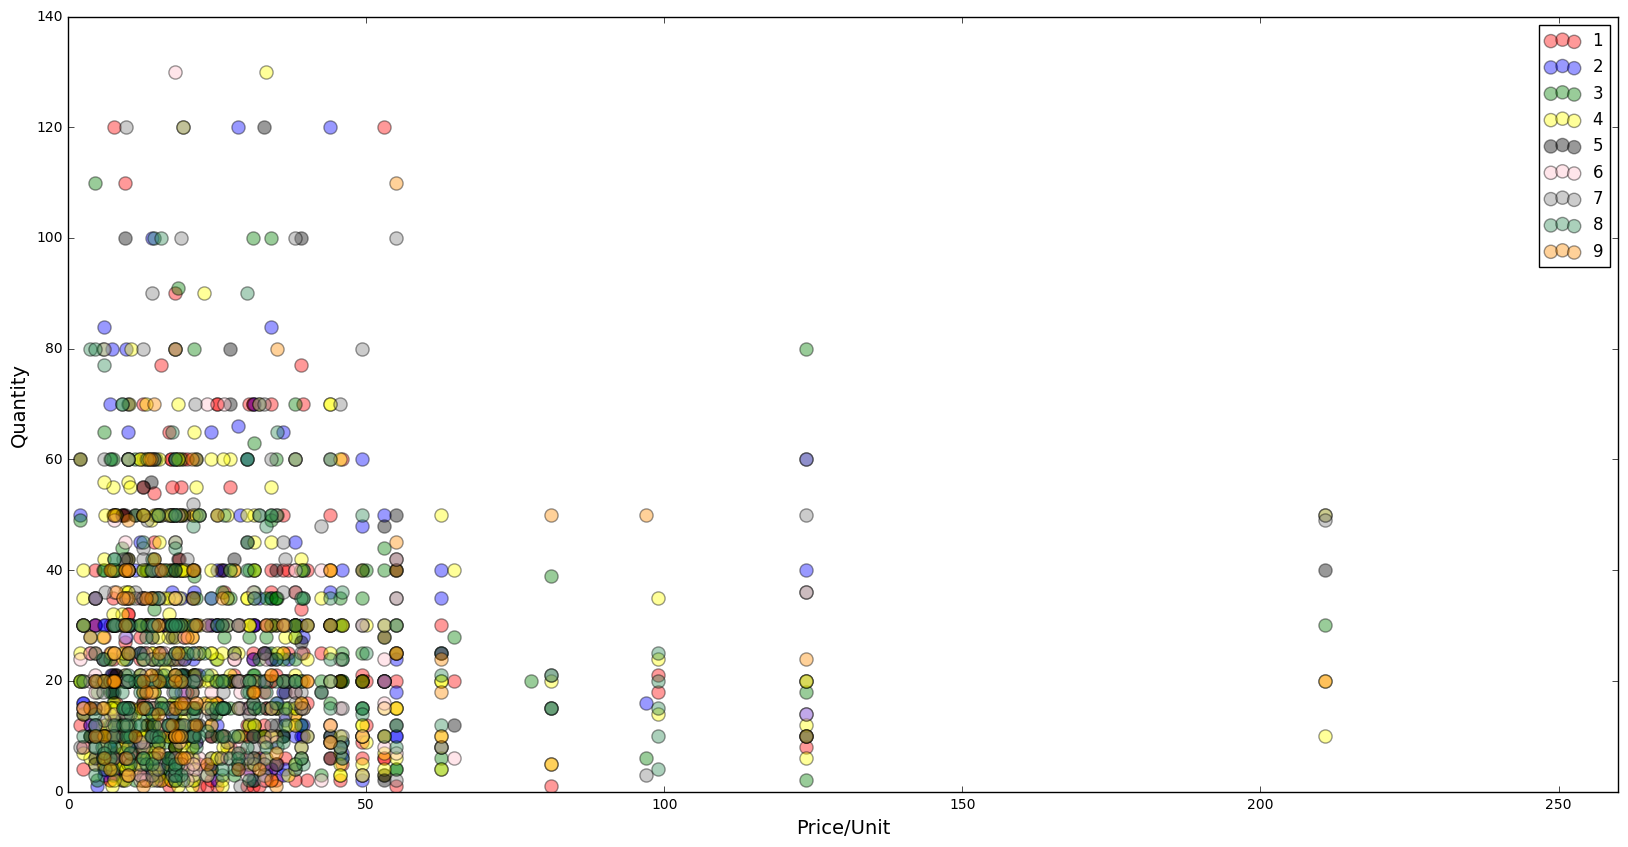

In [30]:
#challenge
employees = list(set(df["EmployeeID"]))
colours = ["red","blue","green","yellow","black","pink","grey","seagreen", "darkorange"]
fig, ax = plt.subplots(figsize=(20,10))
for e,c in zip(employees, colours):
    df[df["EmployeeID"]==e].plot(x="UnitPrice", y="Quantity", ax=ax, kind="scatter", c=c, s=90, alpha=0.4, label=e)
ax.legend()
ax.set_xlabel("Price/Unit", fontsize=14)
ax.set_ylabel("Quantity", fontsize=14)
ax.set_xlim(0,260)
ax.set_ylim(0,140)
employees

### 2) Calculate and plot the total volume of products by month shipped

In [8]:

import datetime
df["ShippedMonth"] = df["ShippedDate"].apply(pd.to_datetime)
df["ShippedMonth"] = df["ShippedMonth"].apply(lambda x: x.month)

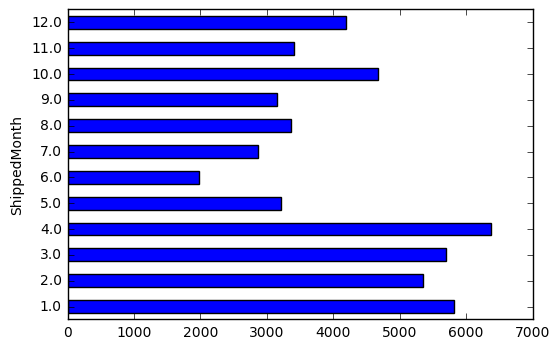

In [9]:
pd.pivot_table(df, index="ShippedMonth", values="Quantity", aggfunc=sum).plot(kind="barh")

### 3) Calculate and plot a histogram of the number of days taken to ship

In [10]:
df["OrderDate"] = df["OrderDate"].apply(pd.to_datetime)
df["ShippedDate"] = df["ShippedDate"].apply(pd.to_datetime)

In [11]:
df["diff"] = (df["ShippedDate"] - df["OrderDate"]).dt.days

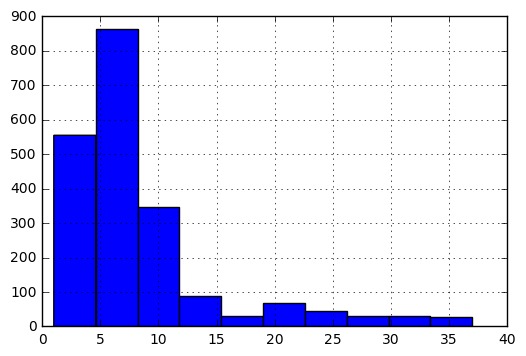

In [12]:
df["diff"].hist()

### Challenge: compare the distributions for USA and UK

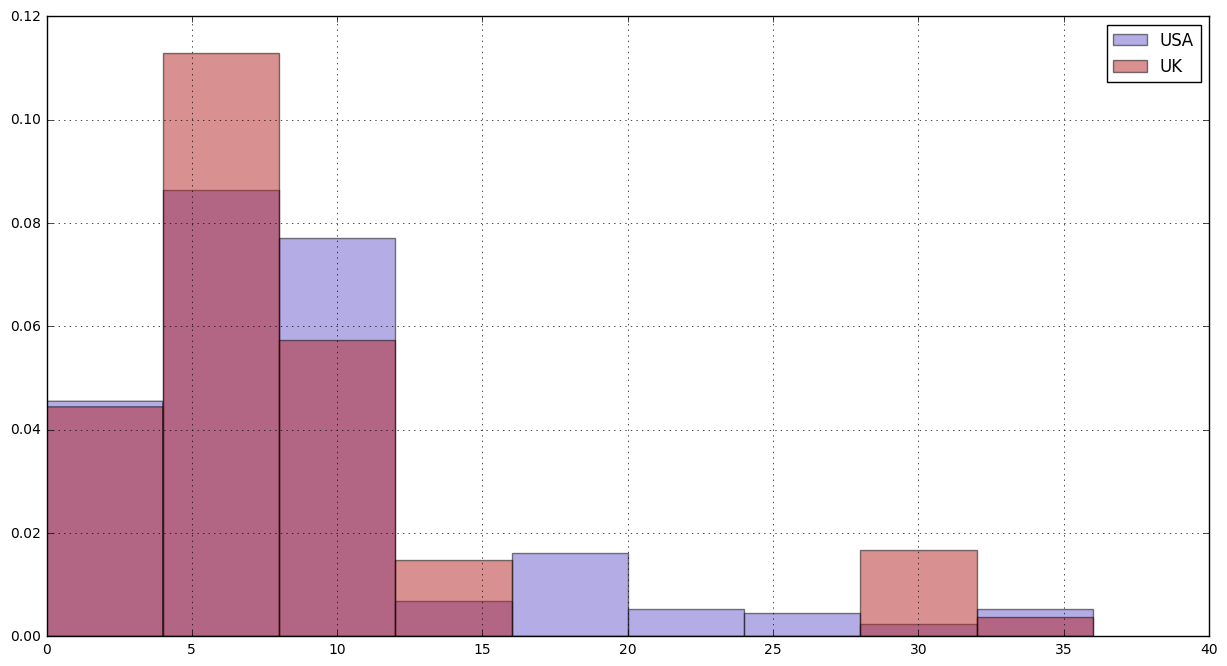

In [13]:
fig, ax = plt.subplots(figsize=(15,8))
bins = range(0,int(df["diff"].max()),4)
df[df["ShipCountry"]=="USA"]["diff"].hist(color="slateblue", normed=True, bins=bins, alpha=0.5, label="USA")
df[df["ShipCountry"]=="UK"]["diff"].hist(color="firebrick", normed=True, bins=bins, alpha=0.5, label="UK")
plt.legend()

### 4) Plot the daily revenues over time (Order Date)

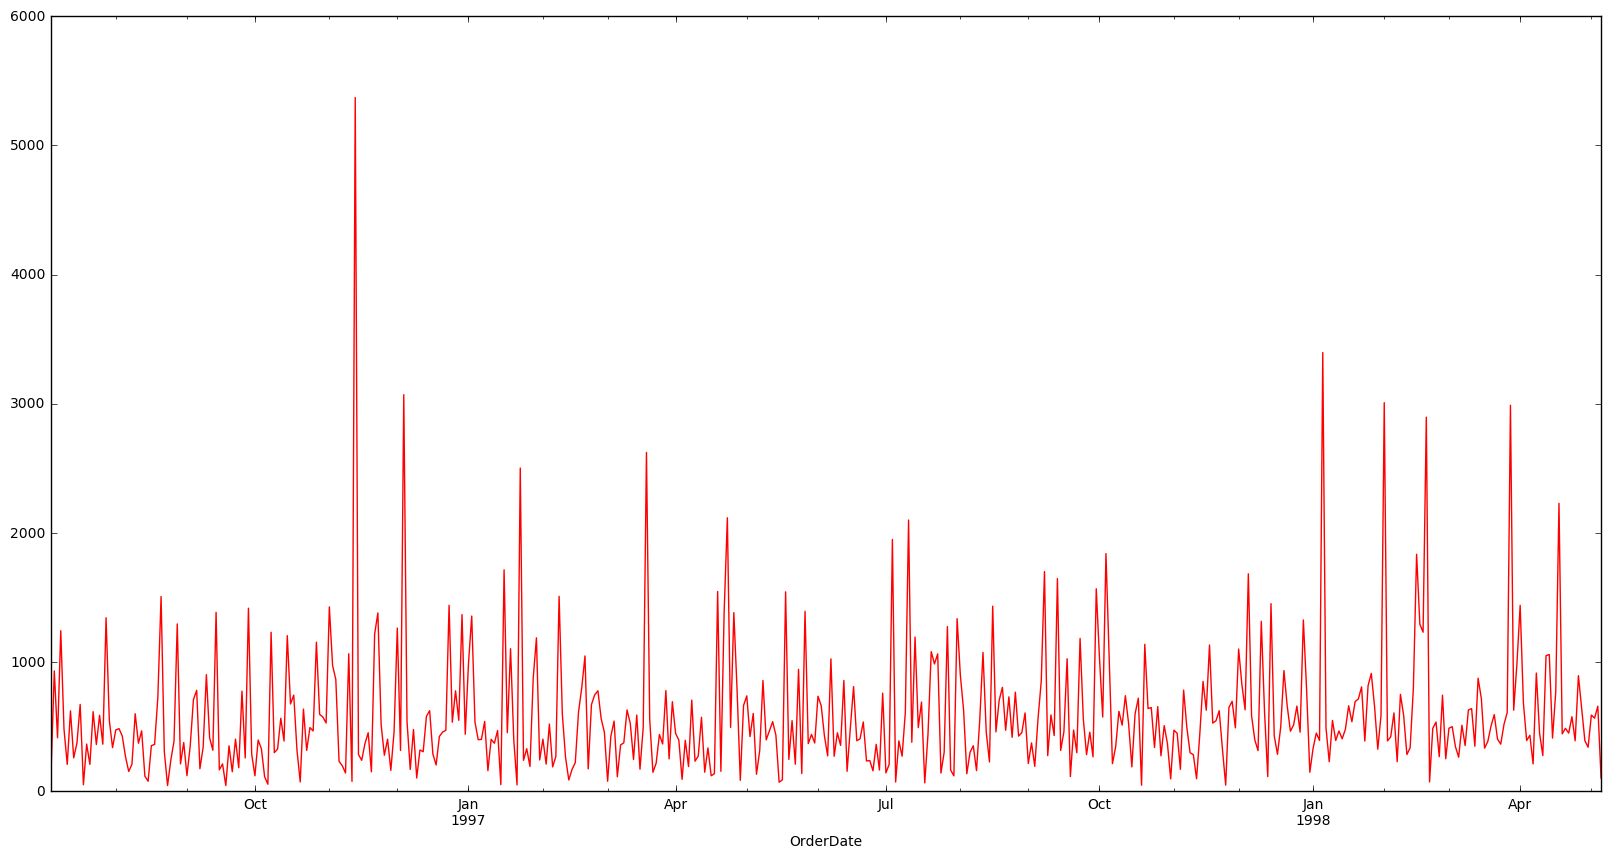

In [14]:
pd.pivot_table(df,index="OrderDate", values="revs").plot(figsize=(20,10), c='r')